## Importing the essential libraries over here


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
data=pd.read_csv("Dataset salary 2024.csv")

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [4]:
data.duplicated().sum()

6421

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Filtering all the numerical features over here

In [8]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
for feature in numerical_features:
  print(feature)

work_year
salary
salary_in_usd
remote_ratio


In [9]:
data[numerical_features]

,work_year,salary,salary_in_usd,remote_ratio
0,2024,202730,202730,0
1,2024,92118,92118,0
2,2024,130500,130500,0
3,2024,96000,96000,0
4,2024,190000,190000,0
...,...,...,...,...
16529,2020,412000,412000,100
16530,2021,151000,151000,100
16531,2020,105000,105000,100
16532,2020,100000,100000,100


## Filtering all the categorical features over here

In [10]:
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
for feature in cat_features:
  print(feature)

experience_level
employment_type
job_title
salary_currency
employee_residence
company_location
company_size


In [11]:
data[cat_features]

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,AI Engineer,USD,US,US,M
1,SE,FT,AI Engineer,USD,US,US,M
2,SE,FT,Data Engineer,USD,US,US,M
3,SE,FT,Data Engineer,USD,US,US,M
4,SE,FT,Machine Learning Engineer,USD,US,US,M
...,...,...,...,...,...,...,...
16529,SE,FT,Data Scientist,USD,US,US,L
16530,MI,FT,Principal Data Scientist,USD,US,US,L
16531,EN,FT,Data Scientist,USD,US,US,S
16532,EN,CT,Business Data Analyst,USD,US,US,L


## Encoding the categorical features into numerical features over here

In [12]:
for feature in cat_features:
  feature_mapping={category:index for index,category in enumerate(data[feature].unique())}
  data[feature]=data[feature].map(feature_mapping)

In [13]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,0,0,0,202730,0,202730,0,0,0,0
1,2024,0,0,0,92118,0,92118,0,0,0,0
2,2024,0,0,1,130500,0,130500,0,0,0,0
3,2024,0,0,1,96000,0,96000,0,0,0,0
4,2024,0,0,2,190000,0,190000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,0,0,6,412000,0,412000,0,100,0,1
16530,2021,1,0,116,151000,0,151000,0,100,0,1
16531,2020,2,0,6,105000,0,105000,0,100,0,2
16532,2020,2,1,107,100000,0,100000,0,100,0,1


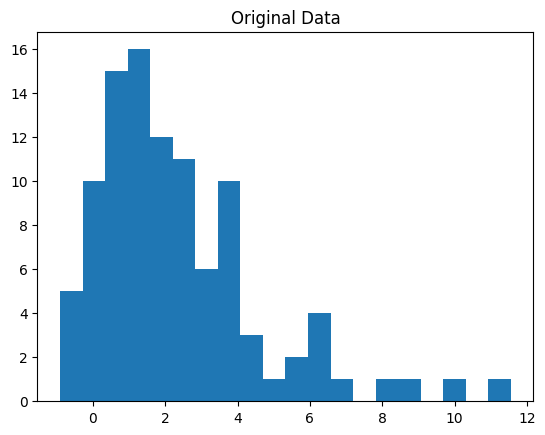

Shapiro-Wilk Test Statistic: 0.8787108063697815
p-value: 1.60125026127389e-07
Data is not likely normally distributed.


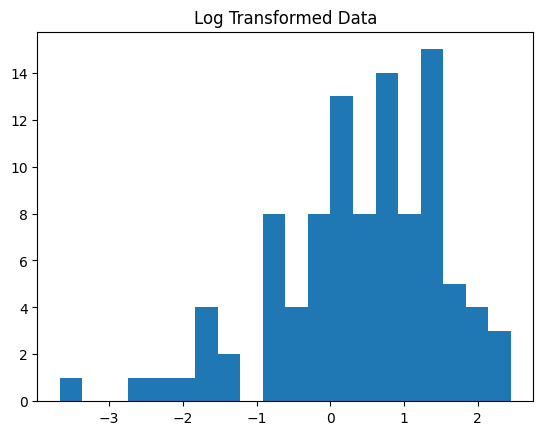

Shapiro-Wilk Test Statistic (Log): 0.9542182087898254
p-value (Log): 0.0015899880090728402
Data is not likely normally distributed after log transformation.


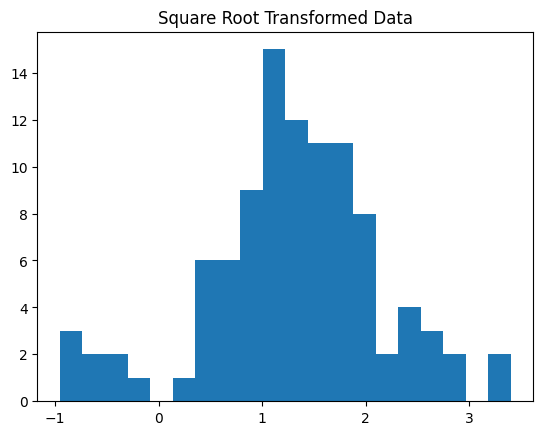

Shapiro-Wilk Test Statistic (Sqrt): 0.9702928066253662
p-value (Sqrt): 0.023276517167687416
Data is not likely normally distributed after square root transformation.


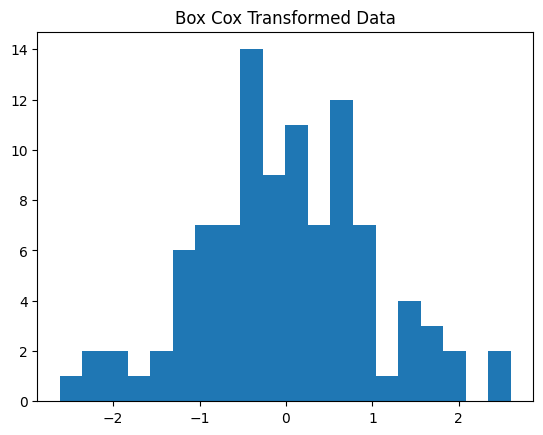

Shapiro-Wilk Test Statistic (Box-Cox): 0.993378758430481
p-value (Box-Cox): 0.9098248481750488
Data is likely normally distributed after Box-Cox transformation.
Best Transformation: Box-Cox


In [33]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Generate some random non-normal data
data = np.random.exponential(scale=2, size=100) + np.random.uniform(-1, 1, size=100)

# Plot histogram of original data
plt.hist(data, bins=20)
plt.title('Original Data')
plt.show()

# Perform Shapiro-Wilk test on original data
w, p = stats.shapiro(data)
print("Shapiro-Wilk Test Statistic:", w)
print("p-value:", p)
if p > 0.05:
    print("Data is likely normally distributed.")
else:
    print("Data is not likely normally distributed.")

# Apply log transformation
log_transformed = np.log(np.abs(data))

# Plot histogram of transformed data
plt.hist(log_transformed, bins=20)
plt.title('Log Transformed Data')
plt.show()

# Perform Shapiro-Wilk test on transformed data
w, p = stats.shapiro(log_transformed)
print("Shapiro-Wilk Test Statistic (Log):", w)
print("p-value (Log):", p)
if p > 0.05:
    print("Data is likely normally distributed after log transformation.")
else:
    print("Data is not likely normally distributed after log transformation.")

# Apply square root transformation
sqrt_transformed = np.sign(data) * np.sqrt(np.abs(data))

# Plot histogram of transformed data
plt.hist(sqrt_transformed, bins=20)
plt.title('Square Root Transformed Data')
plt.show()

# Perform Shapiro-Wilk test on transformed data
w, p = stats.shapiro(sqrt_transformed)
print("Shapiro-Wilk Test Statistic (Sqrt):", w)
print("p-value (Sqrt):", p)
if p > 0.05:
    print("Data is likely normally distributed after square root transformation.")
else:
    print("Data is not likely normally distributed after square root transformation.")

# Apply box cox transformation
pt = PowerTransformer().fit(data[:, np.newaxis])
boxcox_transformed = pt.transform(data[:, np.newaxis]).flatten()

# Plot histogram of transformed data
plt.hist(boxcox_transformed, bins=20)
plt.title('Box Cox Transformed Data')
plt.show()

# Perform Shapiro-Wilk test on transformed data
w, p = stats.shapiro(boxcox_transformed)
print("Shapiro-Wilk Test Statistic (Box-Cox):", w)
print("p-value (Box-Cox):", p)
if p > 0.05:
    print("Data is likely normally distributed after Box-Cox transformation.")
else:
    print("Data is not likely normally distributed after Box-Cox transformation.")

# Compare results and choose best transformation
best_transformation = None
best_p_val = -1
for transf, name in zip([log_transformed, sqrt_transformed, boxcox_transformed], ['Log', 'Square Root', 'Box-Cox']):
    _, p = stats.shapiro(transf)
    if p > best_p_val:
        best_p_val = p
        best_transformation = name

print("Best Transformation:", best_transformation)

## Creating the features and labels over here

In [14]:
data['SALARY']=data['salary']
data.drop('salary',axis=1,inplace=True)

In [15]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

## Splitting the dataset into training set and testing set to avoid the problem of overfitting over here

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc=MinMaxScaler(feature_range=(0,1))
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Training the model on the training set over here

In [29]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# regressor=RandomForestRegressor(n_estimators=10,random_state=0)
# regressor.fit(X_train,y_train)

from xgboost import XGBRegressor
# regressor=XGBRegressor()
# regressor.fit(X_train,y_train)

# from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
regressor=XGBRegressor()
regressor.fit(X_train,y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)